In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam

In [2]:
x,y = make_moons(100,noise=0.25,random_state=2)

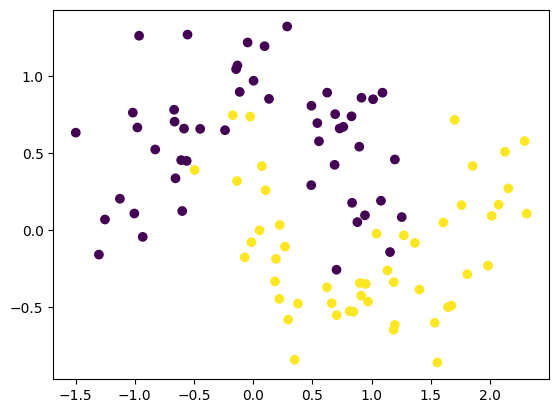

In [3]:
plt.scatter(x=x[:,0],y=x[:,1],c=y)
plt.show()

In [4]:
model = Sequential()

model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history = model.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 14s 1ms/step


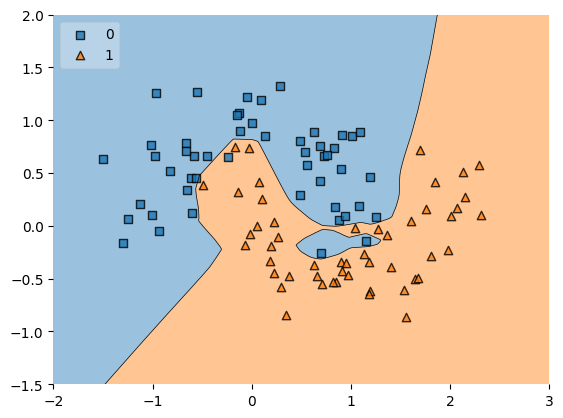

In [6]:
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

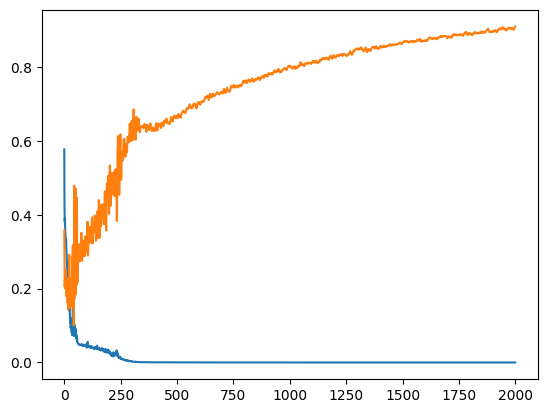

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [8]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(x, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 13s 1ms/step


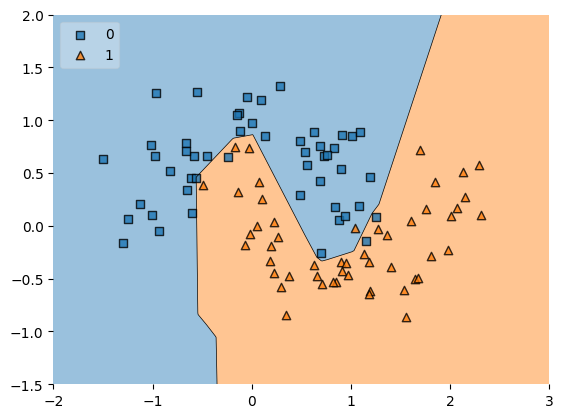

In [13]:
plot_decision_regions(x, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

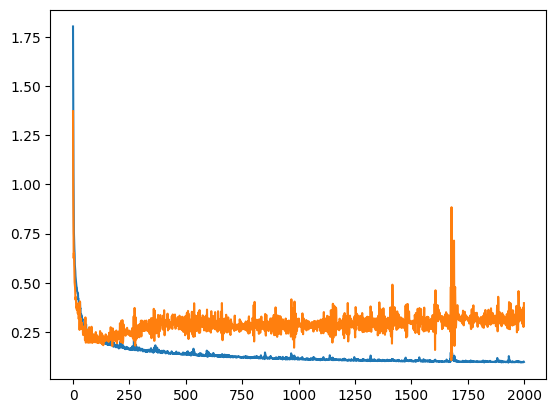

In [14]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [15]:
model1_weight_layer1 = model.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

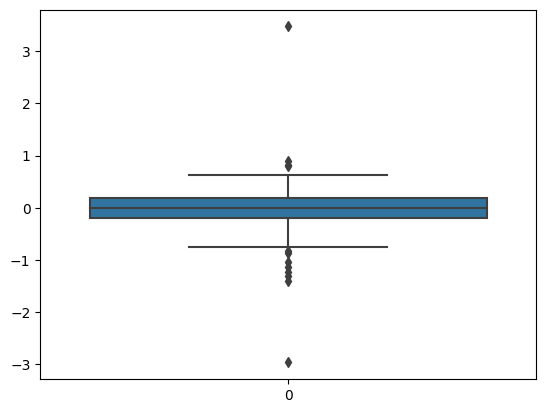

In [16]:
sns.boxplot(model1_weight_layer1)

<Axes: >

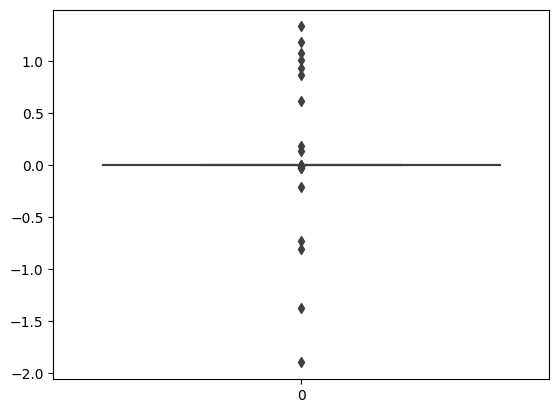

In [17]:
sns.boxplot(model2_weight_layer1)

<Axes: >

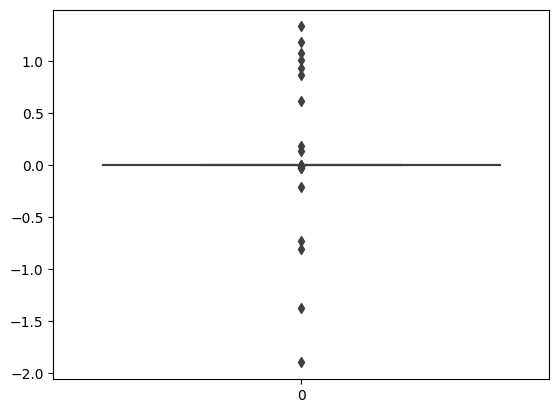

In [18]:
sns.boxplot(model2_weight_layer1)

In [20]:
model1_weight_layer1.min()

-2.9685488

In [21]:
model2_weight_layer1.min()

-1.8968645

C:\Users\emon1\AppData\Local\Temp\ipykernel_2832\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\emon1\AppData\Local\Temp\ipykernel_2832\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

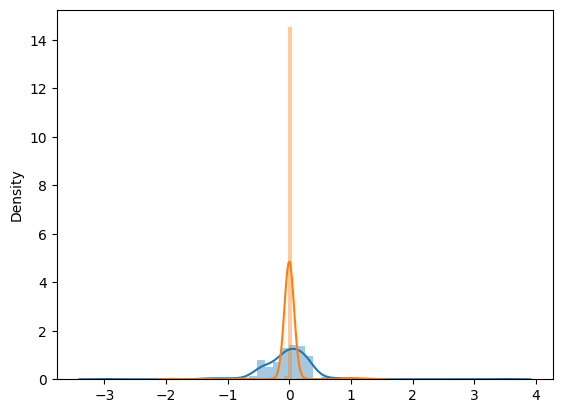

In [22]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [24]:
model.get_weights()[0].reshape(256)

array([-5.01132727e-01,  1.57703742e-01, -3.14193070e-01, -8.42654258e-02,
       -2.14426860e-01, -1.07793160e-01, -4.65302646e-01, -5.07088453e-02,
       -5.00108123e-01,  1.61658138e-01,  3.42907646e-04, -4.62541580e-01,
       -3.17078769e-01, -4.45413142e-01, -9.92347375e-02,  2.85761952e-01,
        3.53274018e-01, -4.48623002e-01,  6.66023269e-02, -6.29978925e-02,
       -4.37486440e-01, -2.23680094e-01,  3.73347759e-01,  1.95269465e-01,
        3.20431978e-01, -4.64986742e-01,  5.84886037e-02,  2.79193848e-01,
        2.13635325e-01, -3.57173532e-01, -4.76158887e-01,  3.03692132e-01,
        3.33428979e-01, -5.50675571e-01, -5.37292659e-02,  2.93167353e-01,
       -1.40434727e-01, -3.53444278e-01,  1.57752320e-01,  8.70396092e-04,
       -6.53537130e-03, -4.90719117e-02, -8.30490068e-02, -3.65381598e-01,
        1.17168792e-01, -4.79810536e-01, -2.31990442e-01,  1.04617029e-01,
       -5.61815277e-02, -4.68498081e-01, -8.69868547e-02,  2.52102822e-01,
       -3.43266696e-01, -